### DASC 521: Intro to ML
### Homework 2: Naive Bayes Classification
### Gamze Keçibaş
---
### CONTENT
- **Step 01.** Import libraries  
- **Step 02.** Import images and labels  
    - **Step 02.1** Train data visualization  
- **Step 03.** Parameter Estimation  
    - **Step 03.1** Calculate sample means  
    - **Step 03.2** Calculate sample standard deviations  
    - **Step 03.3** Calculate class priors    
- **Step 04.** Model training  
    - **Step 04.1** Confusion Matrix of trained model  
- **Step 05.** Model testing  
---

- **Step 01.** Import libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def safelog(x):
    return(np.log(x + 1e-100))

- **Step 02.** Import images and labels

In [2]:
images= np.genfromtxt('hw02_images.csv',delimiter=',').reshape(35000,784)
labels= np.genfromtxt('hw02_labels.csv',delimiter=',').reshape(35000)

In [3]:
# First 30k images are using as training set
# Last 5k images are using as test set

train_images= images[:30000]
train_labels= labels[:30000] 
test_images= images[30000:]      
test_labels= labels[30000:]

print('Total set of images', images.shape)
print('Total set of labels', labels.shape)
print('Training set shape: ', train_images.shape)
print('Training label set shape: ', train_labels.shape)
print('Test set shape: ', test_images.shape)
print('Test label set shape: ', test_labels.shape)

Total set of images (35000, 784)
Total set of labels (35000,)
Training set shape:  (30000, 784)
Training label set shape:  (30000,)
Test set shape:  (5000, 784)
Test label set shape:  (5000,)


- **Step 02.** Import images and labels   
    - **Step 02.1** Train data visualization  

First 20 clothes in Training Set


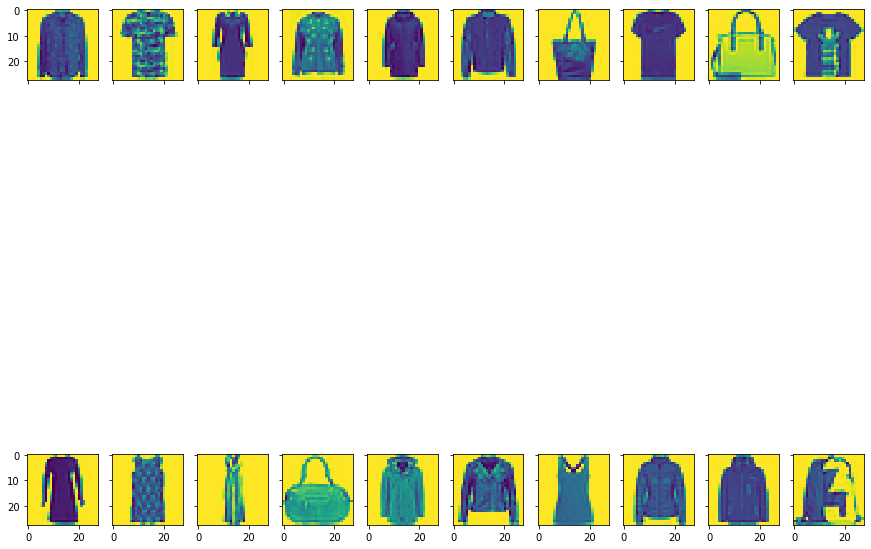

In [4]:
fig, axs = plt.subplots(2,10,figsize=(15,15), sharex= True, sharey=True)
n=0
for i in range(2):
    for j in range(10):
        axs[i,j].imshow(train_images[n].reshape(28,28),interpolation='none')
        n+=1
print('First 20 clothes in Training Set')
plt.show()

- **Step 03.** Parameter Estimation  
    - **Step 03.1** Calculate sample mean

In [5]:
K= int(np.max(train_labels))
n= train_images.shape[0]

sample_means= [np.mean(train_images[train_labels == (c+1)], axis=0) for c in range(K)]
print('Sample means\n')
print('Size of sample means',len(sample_means),'x', len(sample_means[0]), '\n')
for i in range(len(sample_means)):
    print(f'Class [{i+1}]:')
    print(sample_means[i][:10])
    print('...')
    print(sample_means[i][-10:],'\n')

Sample means

Size of sample means 5 x 784 

Class [1]:
[254.99866667 254.98416667 254.85616667 254.66733333 254.54466667
 254.274      253.36283333 249.56366667 239.67583333 221.92416667]
...
[164.412      175.08283333 192.00516667 228.442      248.39266667
 253.13216667 254.2365     254.679      254.87816667 254.95933333] 

Class [2]:
[254.99733333 254.99733333 254.9965     254.99416667 254.8705
 254.6405     254.08       252.97883333 249.87383333 233.35216667]
...
[187.578      218.94733333 241.22766667 250.99266667 253.73433333
 254.58233333 254.9045     254.96883333 254.99216667 254.98866667] 

Class [3]:
[254.99933333 254.99933333 254.99233333 254.9765     254.87966667
 254.8475     254.7205     254.36316667 253.53116667 250.57233333]
...
[227.62333333 237.97533333 243.63633333 212.32866667 184.74433333
 199.76416667 233.05633333 251.52483333 254.4725     254.97483333] 

Class [4]:
[254.99666667 254.98983333 254.91416667 254.69216667 254.18916667
 253.7985     252.88433333 249.06

- **Step 03.** Parameter Estimation  
    - **Step 03.2** Calculate sample standard deviations

In [6]:
sample_stdevs= [np.std(train_images[train_labels == (c+1)], axis=0) for c in range(K)]
print('Sample Standard Deviations\n')
print('Size of sample standard deviations',len(sample_stdevs),'x', len(sample_stdevs[0]), '\n')
for i in range(len(sample_stdevs)):
    print(f'Class [{i+1}]:')
    print(sample_stdevs[i][:10])
    print('...')
    print(sample_stdevs[i][-10:],'\n')

Sample Standard Deviations

Size of sample standard deviations 5 x 784 

Class [1]:
[ 0.09127736  0.25609108  1.31090756  3.80543465  5.27948907  6.97889132
 10.7720867  20.90887244 37.4438435  52.51224063]
...
[61.33922282 62.55887338 62.97645703 47.27240882 24.22176321 11.38112613
  7.69720086  5.29826629  3.9117332   1.93959091] 

Class [2]:
[ 0.2065419   0.2065419   0.2163818   0.23050518  1.9811772   5.61972061
  8.94167769 14.1133643  21.42771372 41.32216288]
...
[64.07292654 53.12548879 34.92773255 17.69346243  9.93552991  4.41681121
  2.2767037   1.04076669  0.47057267  0.70062226] 

Class [3]:
[ 0.05163547  0.04081939  0.16002465  0.21667429  2.82179374  2.85731408
  3.42870915  5.59427773 10.23928848 20.04369646]
...
[51.14423189 41.00799587 31.13997024 62.72873593 76.11316773 67.65612721
 43.2080528  18.43665868  6.7881694   1.1061344 ] 

Class [4]:
[ 0.18436076  0.21617116  1.81046936  4.66455485  8.35111066 10.40547441
 13.11758189 22.03743566 34.98902267 45.99750159]
...


- **Step 03.** Parameter Estimation  
    - **Step 03.3** Calculate class priors

In [7]:
class_priors= [np.mean(train_labels== (c+1)) for c in range(K)]
sum(class_priors)
print('Sample priors\n')
for i in range(len(class_priors)):
    print(f'Prior probability of Class [{i+1}]: ', class_priors[i])
print('\nTotal probability= ', sum(class_priors))

Sample priors

Prior probability of Class [1]:  0.2
Prior probability of Class [2]:  0.2
Prior probability of Class [3]:  0.2
Prior probability of Class [4]:  0.2
Prior probability of Class [5]:  0.2

Total probability=  1.0


- **Step 04** Model training

In [8]:
y_pred_train = []

for i in range(train_images.shape[0]):
    scores= [(sum((-0.5*safelog(2*math.pi)) 
              - safelog(sample_means[c]) 
              - (train_images[i]-sample_means[c])*(train_images[i]-sample_means[c])/(2*sample_stdevs[c]*sample_stdevs[c]))) 
              + safelog(class_priors[c]) for c in range(K)]
    y_pred_train.append(np.argmax(scores)+1)
y_pred_train = np.array(y_pred_train)

- **Step 04.** Model training
    - **Step 04.1** Confusion Matrix of trained model

In [9]:
CM_train = pd.crosstab(y_pred_train, train_labels, rownames = ['y_pred'], colnames = ['y_truth'])
print('Confusion Matrix of the Train Data:\n')
print(CM_train)

Confusion Matrix of the Train Data:

y_truth   1.0   2.0   3.0   4.0   5.0
y_pred                               
1        4436   583    16  1103    20
2         224  4035   173    74    96
3         123   775  4704  1867    33
4         971   574   933  2450   102
5         246    33   174   506  5749


- **Step 05.** Model testing

In [10]:
y_pred_test = []

for i in range(test_images.shape[0]):
    scores= [(sum((-0.5*safelog(2*math.pi)) 
              - safelog(sample_means[c]) 
              - (test_images[i]-sample_means[c])*(test_images[i]-sample_means[c])/(2*sample_stdevs[c]*sample_stdevs[c]))) 
              + safelog(class_priors[c]) for c in range(K)]
    y_pred_test.append(np.argmax(scores)+1)
y_pred_test = np.array(y_pred_test)

CM_test = pd.crosstab(y_pred_test, test_labels, rownames = ['y_pred'], colnames = ['y_truth'])
print('Confusion Matrix of the Test Data:\n')
print(CM_test)

Confusion Matrix of the Test Data:

y_truth  1.0  2.0  3.0  4.0  5.0
y_pred                          
1        736   91    0  199    3
2         45  711   23   13   18
3         19  112  814  289    4
4        143   79  135  416   20
5         57    7   28   83  955
